In [12]:
import numpy as np
x=np.random.randint(low=1, high=100, size=20)
x

array([15, 57, 88, 51, 29, 28, 38, 94, 86, 80, 89, 64, 86, 77,  2, 64, 44,
       51, 33,  3])

In [13]:
a=x.mean()
a

53.95

In [14]:
y=np.random.randint(low=1,high=a,size=20)
y

array([26,  7, 39, 20,  2, 18,  9, 33, 50,  8, 26, 19, 28, 52, 24, 51,  1,
       12, 50, 44])

In [15]:
y.mean()

25.95

The above steps illustrate two numpy arrays x and y whose means are displayed and y array consists of values which are  always less than or equal to that of average of x

In [37]:
import pandas as pd
iris=pd.read_csv("iris.csv")
iris.loc[:25,['sepal_length','petal_length']]

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
5,5.4,1.7
6,4.6,1.4
7,5.0,1.5
8,4.4,1.4
9,4.9,1.5


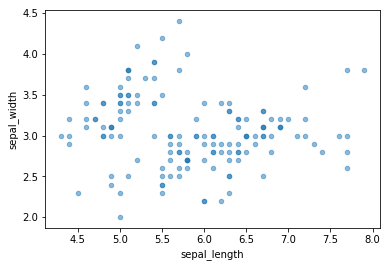

In [39]:
import matplotlib
import matplotlib.pyplot as plt 
iris.plot(kind="scatter",x="sepal_length",y="sepal_width", alpha=0.5)
plt.show()

From the above scatterplot we can infer that if the sepal length is less then the sepal width is high and if the sepal length is high then sepal width is low 

In [55]:
#m=list([1,2,3])
#print(id(m))

1698984618888


In [85]:
x="uday"
print(id(x))
x=x.capitalize()
print(id(x))

1698981811064
1699019195872


In [84]:
x=[14,5,6,7]
print(id(x))
x.append(16)
x
print(id(x))

1699019140552
1699019140552


In [49]:
#a=a.capitalize()
#print(id(a))

1698984612000


Lists and dictionaries are example of mutable objects in python where as Strings are immutable in python. When we modify strings a new copy of the string is created which can be seen in output where as for lists it is still pointing to same location

In [78]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

oecd_bli = pd.read_csv(r"oecd_bli_2015.csv", thousands = ',')
gdp_per_capita = pd.read_csv(r"gdp_per_capita.csv", thousands=',',delimiter='\t', encoding='latin1', na_values="n/a")

In [79]:
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [80]:
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [81]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Voter turnout']].iloc[keep_indices]

In [82]:
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
country_stats

,GDP per capita,Voter turnout
Country,,
Russia,9054.914,65.0
Turkey,9437.372,88.0
Hungary,12239.894,62.0
Poland,12495.334,55.0
Slovak Republic,15991.736,59.0
Estonia,17288.083,64.0
Greece,18064.288,64.0
Portugal,19121.592,58.0
Slovenia,20732.482,52.0


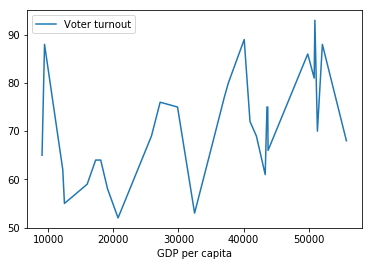

In [83]:
country_stats.plot(x='GDP per capita', y='Voter turnout')
plt.show()

From the above graph we can infer that there is no particular relation between voter turnout and GDP per capita income and it seems to be mercurial 